# Proyek Klasifikasi Gambar: Pizza atau Bukan Pizza
- **Nama :** M. Raihan Al Farizy
- **Email :** mraihanaf0@gmail.com
- **ID Dicoding :**zaterra

# Import Semua Library

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import kagglehub
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns



# Data preparation
## Data Loading

In [3]:
path = kagglehub.dataset_download("carlosrunner/pizza-not-pizza")
path = os.path.join(path, "pizza_not_pizza")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/pizza-not-pizza/pizza_not_pizza


# Data Preprocessing
## Split Datasets

In [4]:
IMAGE_SIZE = (256, 256)
BATCH_SIZE = 32
SEED = 123


In [7]:
full_ds = image_dataset_from_directory(
    path,
    labels='inferred',
    label_mode='binary',
    color_mode='grayscale',
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=SEED
)


Found 1966 files belonging to 2 classes.


In [8]:
total = 0
for batch, _ in full_ds:
    total += batch.shape[0]
print(f"Total images: {total}")


Total images: 1966


In [9]:
train_count = int(0.8 * total)
val_count   = int(0.1 * total)
test_count  = total - train_count - val_count

print(f"Train: {train_count},  Val: {val_count},  Test: {test_count}")


Train: 1572,  Val: 196,  Test: 198


In [10]:
ds = full_ds.unbatch().shuffle(total, seed=SEED)

train_ds = ds.take(train_count).batch(BATCH_SIZE)
val_ds   = ds.skip(train_count).take(val_count).batch(BATCH_SIZE)
test_ds  = ds.skip(train_count + val_count).batch(BATCH_SIZE)


# Modelling

In [11]:
model = keras.Sequential([
    layers.Input(shape=(*IMAGE_SIZE, 1)),

    # Block 1
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(2),

    # Block 2
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(2),

    # Block 3
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      16,777,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,870,145 (64.35 MB)

 Trainable params: 16,870,145 (64.35 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

## Model Training

In [13]:
EPOCHS = 10
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=val_ds,
    verbose=2
)


Epoch 1/10


50/50 - 22s - 444ms/step - accuracy: 0.5000 - loss: 31.2388 - val_accuracy: 0.6888 - val_loss: 0.6703
Epoch 2/10
50/50 - 9s - 175ms/step - accuracy: 0.6260 - loss: 0.6632 - val_accuracy: 0.7398 - val_loss: 0.5731
Epoch 3/10
50/50 - 10s - 191ms/step - accuracy: 0.6648 - loss: 0.6098 - val_accuracy: 0.7857 - val_loss: 0.4907
Epoch 4/10
50/50 - 9s - 176ms/step - accuracy: 0.7360 - loss: 0.5164 - val_accuracy: 0.8622 - val_loss: 0.3661
Epoch 5/10
50/50 - 10s - 193ms/step - accuracy: 0.7913 - loss: 0.4316 - val_accuracy: 0.8367 - val_loss: 0.3756
Epoch 6/10
50/50 - 9s - 177ms/step - accuracy: 0.8403 - loss: 0.3591 - val_accuracy: 0.8929 - val_loss: 0.3103
Epoch 7/10
50/50 - 10s - 196ms/step - accuracy: 0.8791 - loss: 0.3009 - val_accuracy: 0.7755 - val_loss: 0.3969
Epoch 8/10
50/50 - 9s - 176ms/step - accuracy: 0.8969 - loss: 0.2275 - val_accuracy: 0.9388 - val_loss: 0.1488
Epoch 9/10
50/50 - 11s - 214ms/step - accuracy: 0.9383 - loss: 0.2268 - val_accuracy: 0.9592 - val_loss: 0.1548
Epoch 

# Evaluasi Dan Visualisasi

In [14]:
test_loss, test_acc = model.evaluate(test_ds, verbose=2)
print(f"Test accuracy: {test_acc:.4f},  Test loss: {test_loss:.4f}")


7/7 - 4s - 532ms/step - accuracy: 0.9697 - loss: 0.0952
Test accuracy: 0.9697,  Test loss: 0.0952


In [21]:
y_true = []
y_pred = []

for imgs, labels in test_ds:
    preds = model.predict(imgs, verbose=0)
    y_true.extend(labels.numpy().reshape(-1).astype(int))
    y_pred.extend((preds > 0.5).astype(int).reshape(-1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

print(f"Total predictions: {len(y_pred)}")

Total predictions: 198


In [36]:
print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}\n")
print("Classification Report:")
print(classification_report(
    y_true, y_pred,
    target_names=full_ds.class_names,  # ['not_pizza', 'pizza']
    digits=4
))


Accuracy: 0.9798

Classification Report:
              precision    recall  f1-score   support

   not_pizza     1.0000    0.9535    0.9762        86
       pizza     0.9655    1.0000    0.9825       112

    accuracy                         0.9798       198
   macro avg     0.9828    0.9767    0.9793       198
weighted avg     0.9805    0.9798    0.9797       198



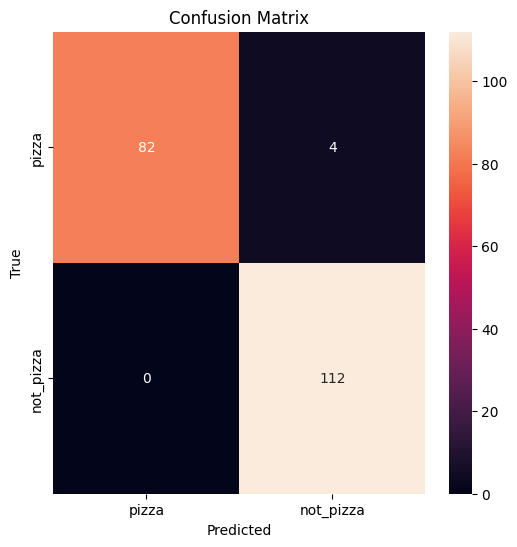

In [32]:
# Confusion matrix
label_map = {'pizza': 1, 'not_pizza': 0}
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


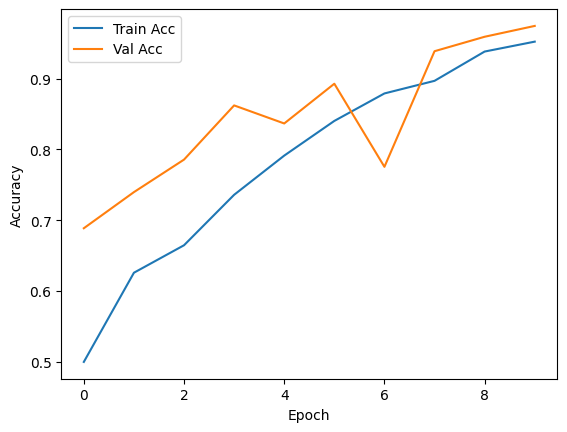

In [29]:
plt.figure()
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend(); plt.show()


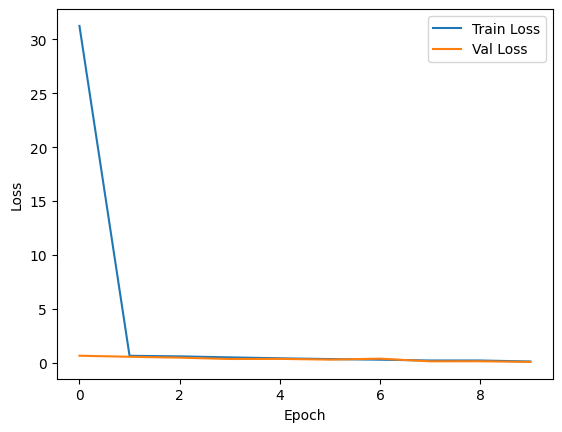

In [25]:
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend(); plt.show()

# Konversi Model

In [33]:
model.save("pizza_model.keras")

model.export("saved_model_tf")

converter = tf.lite.TFLiteConverter.from_saved_model("saved_model_tf")
tflite_model = converter.convert()
with open("model.tflite", "wb") as f:
    f.write(tflite_model)


Saved artifact at 'saved_model_tf'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  140153772289360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140153723825296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140153723824720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140153723825488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140153723826064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140153723822608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140153772288016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140153723822800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140153723827024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140153723828560: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [34]:
!pip install tensorflowjs
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, "tfjs_model")


failed to lookup keras version from the file,
    this is likely a weight only file


In [35]:
import shutil
from google.colab import files

shutil.make_archive("saved_model_tf", 'zip', "saved_model_tf")
files.download("saved_model_tf.zip")

shutil.make_archive("tfjs_model", 'zip', "tfjs_model")
files.download("tfjs_model.zip")

!pip freeze > requirements.txt
files.download('requirements.txt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>